# Lab 2: The Data Frame

# PART 0: Meetings

In this lab we will work with a (subset) of the [Million Songs Dataset](https://labrosa.ee.columbia.edu/millionsong/).

The dataset contains information about many songs, artists, and their locations.  
It is composed of three different data containers.  
Each one of this containers is a **dataframe**, a particular way of storing and structuring data.  
In R, dataframes are conveniently handled using the functions provided by the _tiyverse_ libraries, hence let's load them.

In [11]:
#install.packages("tidyverse")
#install.packages("devtools")

also installing the dependencies ‘ini’, ‘clisymbols’, ‘desc’, ‘gh’, ‘rprojroot’, ‘xopen’, ‘brew’, ‘commonmark’, ‘praise’, ‘usethis’, ‘git2r’, ‘memoise’, ‘pkgbuild’, ‘pkgload’, ‘rcmdcheck’, ‘remotes’, ‘roxygen2’, ‘sessioninfo’, ‘testthat’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(tidyverse)
library(devtools)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


What information are we getting here?

The packages attached are the ones that tidyverse is loading for us, and whose functions we can call directly.

There are, however, some "conflicts": we loaded some packages (in this case "dplyr" and "stats", which is there always when you start R) that define functions with the same name (`filter()` and `lag()`). As for R specifications, if we call a function loaded by two packages, and do not explicitly say which one to use, the one defined in the latter loaded package will be used. In this case, as we loaded dplyr (through tidyverse) after stats, if we use `filter()` we are going to use dplyr's filter.

What if we wanted to use another same named function? Well, in that case we would need to specify the package. We can do it by prepending `name_of_wanted_package::` to the function. In this case, if we wanted stats' version of `filter()`, we would need to write `stats::filter()` (see also the package [conflicted](https://github.com/r-lib/conflicted) for a different way of handling this problem)

#### Now we have to get the data.  
The dataset is convienently stored in a _github repository_, which is publicly accessible online, and is presented as a R package, so we don't need to worry about how to read it in R.  

To get it, we can use the `install_github()` function, available throught the `devtools` library.

In [22]:
devtools::install("/home/jen/singer")

Rcpp     (1.0.1  -> 1.0.2 ) [CRAN]
digest   (0.6.18 -> 0.6.20) [CRAN]
curl     (3.3    -> 4.0   ) [CRAN]
mime     (0.6    -> 0.7   ) [CRAN]
openssl  (1.3    -> 1.4.1 ) [CRAN]
sys      (3.1    -> 3.2   ) [CRAN]
evaluate (0.13   -> 0.14  ) [CRAN]


Installing 7 packages: Rcpp, digest, curl, mime, openssl, sys, evaluate
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


✔  checking for file ‘/home/jen/singer/DESCRIPTION’
─  preparing ‘singer’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘singer_0.0.0.9000.tar.gz’
   
Running /home/jen/anaconda3/lib/R/bin/R CMD INSTALL \
  /tmp/Rtmp0QmzdW/singer_0.0.0.9000.tar.gz --install-tests 
* installing to library ‘/home/jen/anaconda3/lib/R/library’
* installing *source* package ‘singer’ ...
** R
** data
*** moving datasets to lazyload DB
** tests
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded
* DONE (singer)


Now use the `library()` function to load it.

In [2]:
library(singer)

We can obtain a quick overview of what dataset are now available via `singer` using the `data()` function.  

In [3]:
data(package = "singer")

Package,Item,Title
<chr>,<chr>,<chr>
singer,locations,locations
singer,singer_locations,singer locations
singer,songs,songs


These are the dataset available, but to use them we need to load them in the memory.  
We use `data()` to load in memory one of those datasets.  

In [25]:
data(singer_locations)

# PART 1: introductions

Let's have a look at what's in the dataset. But let's play safe: we don't know how big it is and we don't want to print to screen too much stuff.  
So, how many rows of data we have?

In [26]:
singer_locations %>%
  nrow()

[1] 10100

And how many columns?  
The function we are going to use is `ncol()` (_**n**umber of **col**umns_).  
Use the pipe (`%>%`) and `ncol()` to discover how many columns are there in `singer_locations`

In [28]:
singer_locations  %>%
ncol()

[1] 14

We can use `head()`, `tail()` or the beautiful `glimpse()` to peek at the dataset.

In [29]:
singer_locations %>%
  head()

track_id,title,song_id,release,artist_id,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city
TRWICRA128F42368DB,The Conversation (Cd),SOSURTI12A81C22FB8,Even If It Kills Me,ARACDPV1187FB58DF4,Motion City Soundtrack,2007,170.4485,0.6410183,0.8230522,NA,NA,NA,NA
TRXJANY128F42246FC,Lonely Island,SODESQP12A6D4F98EF,The Duke Of Earl,ARYBUAO1187FB3F4EB,Gene Chandler,2004,106.5530,0.3937627,0.5700167,41.88415,-87.63241,Gene Chandler,"Chicago, IL"
TRIKPCA128F424A553,Here's That Rainy Day,SOQUYQD12A8C131619,Imprompture,AR4111G1187B9B58AB,Paul Horn,1998,527.5947,0.4306226,0.5039940,40.71455,-74.00712,Paul Horn,"New York, NY"
TRYEATD128F92F87C9,Rego Park Blues,SOEZGRC12AB017F1AC,Still River,ARQDZP31187B98D623,Ronnie Earl & the Broadcasters,1995,695.1179,0.3622792,0.4773099,NA,NA,NA,NA
TRBYYXH128F4264585,Games,SOPIOCP12A8C13A322,Afro-Harping,AR75GYU1187B9AE47A,Dorothy Ashby,1968,237.3220,0.4107520,0.5303468,42.33168,-83.04792,Dorothy Ashby,"Detroit, MI"
TRKFFKR128F9303AE3,More Pipes,SOHQSPY12AB0181325,Six Yanks,ARCENE01187B9AF929,Barleyjuice,2006,192.9400,0.3762635,0.5412950,40.99471,-77.60454,Barleyjuice,Pennsylvania


Try your hand with `tail()` and `glimpse()`.

In [31]:
singer_locations %>%
  tail()

track_id,title,song_id,release,artist_id,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city
TRNHZEE128F425DC25,Pull Up to Da Light,SOOFGYD12A8C138041,Da Kush,ARRHMNH1187FB46512,T-Rock,0,276.0355,0.3809877,0.5048331,32.67828,-83.22295,T-Rock,Georgia
TRNBOMT128F92FF4E0,Hideaway,SOAZFOU12A58A79370,Live at Peppers '68,ARRR4Y81187FB524CE,Lonnie Brooks,0,341.3677,0.3847638,0.4421961,30.76753,-92.11789,Lonnie Brooks,"Dubuisson, LA"
TRCVRSU128EF34A53C,Killing Me Softly,SOFUGDP12A6BD4F1E2,Eternal Love Songs,AR0XFXQ1187B98C49F,Con & Dec_ The Bachelors,0,299.1538,0.3558477,0.4982286,53.34376,-6.24953,The Bachelors,"Dublin, Ireland"
TRHSWOW128F4223266,With It,SOFVMUU12A81C22AC3,Still Bangin' EP,AR9EZKS1187B98B705,DJ Liquid,0,406.0469,0.3532875,0.5482772,NA,NA,NA,NA
TRCEMNR128F92E0379,This Is Reality,SOQJOJG12A8C14328A,Live At Belvedere Hall 1983,AR7H5R61187FB39453,Psyche,0,434.3636,0.4309886,0.6163738,NA,NA,NA,NA
TRLCVCR128F9349A49,Waking Up (Key-Bb-Premiere Performance Plus),SOYEPYG12AB018817E,Waking Up (Premiere Performance Plus Track),ARNJ9M91187FB3906D,Charlie Hall,0,289.1228,0.4474504,0.6378583,NA,NA,NA,NA


In [30]:
singer_locations %>%
  glimpse()

Observations: 10,100
Variables: 14
$ track_id           <chr> "TRWICRA128F42368DB", "TRXJANY128F42246FC", "TRIKP…
$ title              <chr> "The Conversation (Cd)", "Lonely Island", "Here's …
$ song_id            <chr> "SOSURTI12A81C22FB8", "SODESQP12A6D4F98EF", "SOQUY…
$ release            <chr> "Even If It Kills Me", "The Duke Of Earl", "Improm…
$ artist_id          <chr> "ARACDPV1187FB58DF4", "ARYBUAO1187FB3F4EB", "AR411…
$ artist_name        <chr> "Motion City Soundtrack", "Gene Chandler", "Paul H…
$ year               <int> 2007, 2004, 1998, 1995, 1968, 2006, 2003, 2007, 19…
$ duration           <dbl> 170.4485, 106.5530, 527.5947, 695.1179, 237.3220, …
$ artist_hotttnesss  <dbl> 0.6410183, 0.3937627, 0.4306226, 0.3622792, 0.4107…
$ artist_familiarity <dbl> 0.8230522, 0.5700167, 0.5039940, 0.4773099, 0.5303…
$ latitude           <dbl> NA, 41.88415, 40.71455, NA, 42.33168, 40.99471, NA…
$ longitude          <dbl> NA, -87.63241, -74.00712, NA, -83.04792, -77.60454…
$ name           

### Reflection time
**Q** What information about the _structure_ of `singer_locations` could you grasp from glimpsing?

The data frame has 14 variables for each song. See above to see what these are. 

## Selecting

Sometimes we don't want to see all the columns of a dataframe, but just a few or one. That is possible using the `select()` function. Let's see how it works.

In [32]:
singer_locations %>%
  select(title) %>% # let's see only the title column
  head() # and just a few rows

title
The Conversation (Cd)
Lonely Island
Here's That Rainy Day
Rego Park Blues
Games
More Pipes


fill in the following code to show only a coupld of `artist_name`:

In [34]:
singer_locations %>%
  select(artist_name) %>%
  head()

artist_name
Motion City Soundtrack
Gene Chandler
Paul Horn
Ronnie Earl & the Broadcasters
Dorothy Ashby
Barleyjuice


Moreover, tidyverse (specifically, dplyr) offers you helper functions to select some column, for example:

In [35]:
singer_locations %>%
  select(ends_with("id")) %>% # let's see only the columns which names ends with "id"
  head()

track_id,song_id,artist_id
TRWICRA128F42368DB,SOSURTI12A81C22FB8,ARACDPV1187FB58DF4
TRXJANY128F42246FC,SODESQP12A6D4F98EF,ARYBUAO1187FB3F4EB
TRIKPCA128F424A553,SOQUYQD12A8C131619,AR4111G1187B9B58AB
TRYEATD128F92F87C9,SOEZGRC12AB017F1AC,ARQDZP31187B98D623
TRBYYXH128F4264585,SOPIOCP12A8C13A322,AR75GYU1187B9AE47A
TRKFFKR128F9303AE3,SOHQSPY12AB0181325,ARCENE01187B9AF929


In [36]:
singer_locations %>%
  select(track_id : artist_id) %>% # let's see only the columns between track_id and artist_id
  head()

track_id,title,song_id,release,artist_id
TRWICRA128F42368DB,The Conversation (Cd),SOSURTI12A81C22FB8,Even If It Kills Me,ARACDPV1187FB58DF4
TRXJANY128F42246FC,Lonely Island,SODESQP12A6D4F98EF,The Duke Of Earl,ARYBUAO1187FB3F4EB
TRIKPCA128F424A553,Here's That Rainy Day,SOQUYQD12A8C131619,Imprompture,AR4111G1187B9B58AB
TRYEATD128F92F87C9,Rego Park Blues,SOEZGRC12AB017F1AC,Still River,ARQDZP31187B98D623
TRBYYXH128F4264585,Games,SOPIOCP12A8C13A322,Afro-Harping,AR75GYU1187B9AE47A
TRKFFKR128F9303AE3,More Pipes,SOHQSPY12AB0181325,Six Yanks,ARCENE01187B9AF929


And we can also decide which columns NOT to have:

In [37]:
singer_locations %>%
  select(-ends_with("id")) %>% # let's drop the "id" columns
  head()

title,release,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city
The Conversation (Cd),Even If It Kills Me,Motion City Soundtrack,2007,170.4485,0.6410183,0.8230522,NA,NA,NA,NA
Lonely Island,The Duke Of Earl,Gene Chandler,2004,106.5530,0.3937627,0.5700167,41.88415,-87.63241,Gene Chandler,"Chicago, IL"
Here's That Rainy Day,Imprompture,Paul Horn,1998,527.5947,0.4306226,0.5039940,40.71455,-74.00712,Paul Horn,"New York, NY"
Rego Park Blues,Still River,Ronnie Earl & the Broadcasters,1995,695.1179,0.3622792,0.4773099,NA,NA,NA,NA
Games,Afro-Harping,Dorothy Ashby,1968,237.3220,0.4107520,0.5303468,42.33168,-83.04792,Dorothy Ashby,"Detroit, MI"
More Pipes,Six Yanks,Barleyjuice,2006,192.9400,0.3762635,0.5412950,40.99471,-77.60454,Barleyjuice,Pennsylvania


## Plot, listen, 3D print, ...

Identifying the presence of regularities or irregularities in the data by simply reading the values in a dataset is difficult. Not impossible, and sometime you need to do it.   Visual, audio, ..., representations of data leverage on the human ability to parse information. Thus, let's use those representations as often as we can.

(Unfortunately) visual representations are much more supported than any other expressive means (at least in R and many other programming language).  
So, let's get artistic. Here I will focus on plotting data, but if visual is not for you come talk with me and we can find a solution.

One of the first packages we see is called `skimr` (more infor [here](https://github.com/ropensci/skimr) )

In [40]:
devtools::install("/home/jen/skimr")

pander (NA -> 0.6.3) [CRAN]


Installing 1 packages: pander
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


✔  checking for file ‘/home/jen/skimr/DESCRIPTION’
─  preparing ‘skimr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘skimr_1.0.7.tar.gz’
   
Running /home/jen/anaconda3/lib/R/bin/R CMD INSTALL \
  /tmp/Rtmp0QmzdW/skimr_1.0.7.tar.gz --install-tests 
* installing to library ‘/home/jen/anaconda3/lib/R/library’
* installing *source* package ‘skimr’ ...
** R
** inst
** tests
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded
* DONE (skimr)


In [41]:
library(skimr)


Attaching package: ‘skimr’

The following object is masked from ‘package:stats’:

    filter



The main function is called `skim()`.  
Warning: it will spit out a lot of text, especially if your dataset has many columns...

In [43]:
singer_locations %>%
  skim() %>%
  head()

variable,type,stat,level,value,formatted
track_id,character,missing,.all,0,0
track_id,character,complete,.all,10100,10100
track_id,character,n,.all,10100,10100
track_id,character,min,.all,18,18
track_id,character,max,.all,18,18
track_id,character,empty,.all,0,0


Uuuh, we have a LOT of information there, and it is not very easy to read it.  
Luckily, `skimr` has a hand function, `kable()`, that organise that information into a more compact format.

In [44]:
singer_locations %>%
  skim() %>%
  kable()

Skim summary statistics  
 n obs: 10100    
 n variables: 14    

Variable type: character

|  variable   | missing | complete |   n   | min | max | empty | n_unique |
|-------------|---------|----------|-------|-----|-----|-------|----------|
|  artist_id  |    0    |  10100   | 10100 | 18  | 18  |   0   |   7346   |
| artist_name |    0    |  10100   | 10100 |  2  | 127 |   0   |   7498   |
|    city     |  5971   |   4129   | 10100 |  2  | 90  |   0   |   1316   |
|    name     |  5968   |   4132   | 10100 |  1  | 223 |   0   |   2912   |
|   release   |    0    |  10100   | 10100 |  1  | 125 |   0   |   9049   |
|   song_id   |    0    |  10100   | 10100 | 18  | 18  |   0   |  10100   |
|    title    |    0    |  10100   | 10100 |  1  | 118 |   0   |   9799   |
|  track_id   |    0    |  10100   | 10100 | 18  | 18  |   0   |  10100   |

Variable type: integer

| variable | missing | complete |   n   |  mean   |   sd   | p0 | p25  | p50  | p75  | p100 |   hist   |
|----------|------

Ok, there's a lot to unpack here.

Each row in the tables describes a column of the dataframe.

Let's see what some of these descriptors mean:

- **missing**/**complete**: the amount of rows having values that R recognise as "missing" / the amount of rows having non-missing values
- **n**: the total amount of rows 
- **min**/**max**: the minimal and maximal number of characters
- **n_unique**: the number of unique values
- **mean**, **sd**, **p0**, **p25**, **p50**, **p100**: statistical descriptors of the values distribution
- **hist**: an histogram of the values

### Quiz Time

**warm up**
- How many cities are present in the dataframe? 1316
- How many different song titles? 9799
- How old is the newest song? 2010

**handle with care**
- How old is the oldest song?
- How many artists? 7346

### Reflection time

The 14 columns in `singer_locations` have been organised into three groups:  
- **character**: this is stuff containing "text", "words" and similar
- **integer**: this is stuff that is expressed as wholesome integers (42, 1984, 38, -4, ...)
- **numeric**: this is stuff that is express by numbers with some amount of digits (3.14, 1.67, 0.33333, ...)

**Q** Why do you think `skim()` summarise those differently?

You can not find the same stats on words as you can on numbers

Well, the visualization here was quite limited (just a tiny histogram), but already we have a deeper understanding of our data source.  
Let's get more visual, with `visdat` (see [here](https://github.com/ropensci/visdat) for more details).

In [5]:
remotes::install_github("ropensci/visdat")

Skipping 7 packages ahead of CRAN: assertthat, cli, digest, glue, pillar, Rcpp, rlang


✔  checking for file ‘/tmp/RtmppHFolO/remotes314d8e94c6/ropensci-visdat-cd53490/DESCRIPTION’ (393ms)
─  preparing ‘visdat’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘visdat_0.5.3.9000.tar.gz’
   


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [6]:
library(visdat)

The library `visdat` has been developed by Nicholas Tierney and others to give quick access to usefull preliminary visualization of dataframes.  
We read that we have some missing values in our dataframe. Let's have a look:

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

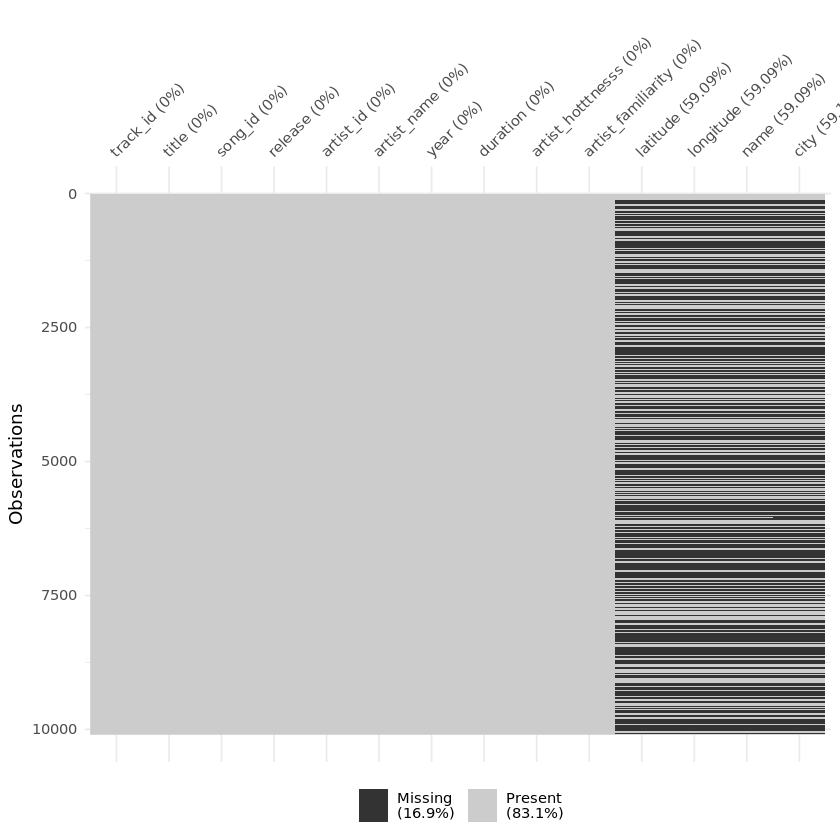

In [7]:
singer_locations %>%
  vis_miss()

From the visualisation, it appears that the missing values are all from the same rows. How "big" is that blog of missingness?
We can set the option (technically an _argument_) `cluster` to `TRUE` to show it.

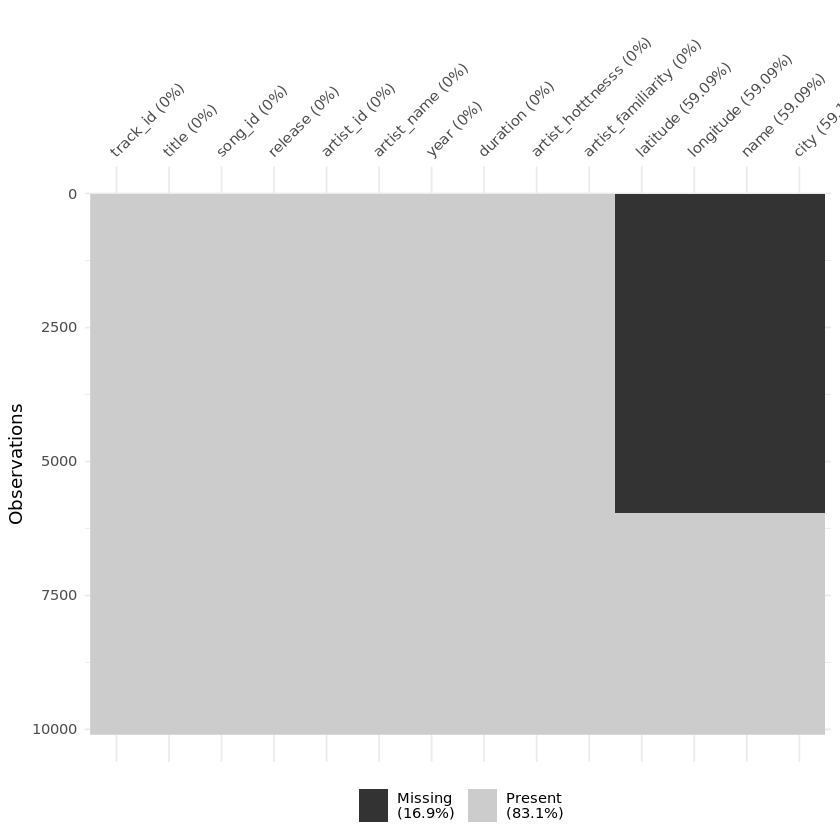

In [8]:
singer_locations %>%
  vis_miss(cluster = TRUE)

That's a large chunck, isn't it?

# PART 2: verbs

Enough preliminaries, we want to plot! And do stuff!

Sure enough, there you go!

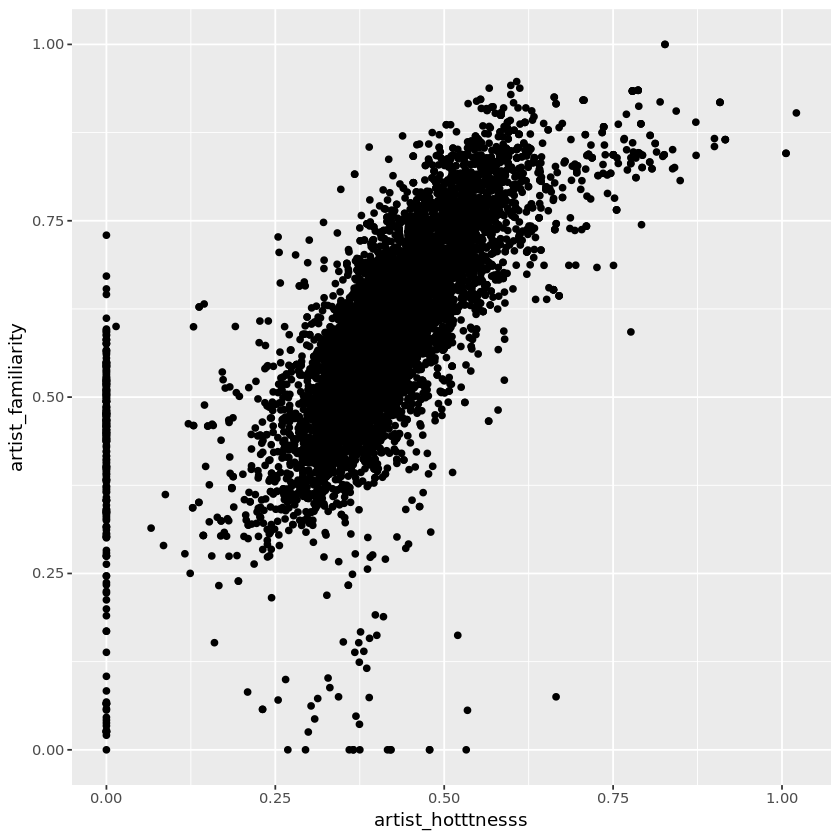

In [9]:
singer_locations %>% # this will define where we get the data from
  ggplot( # we are using the ggplot2 library (it's been loaded together with tidyverse)
  mapping = # the mapping defines how the features of the data frame will be placed on the drawing area
      aes( # aes stands for aesthetics: this are the visual properties of the graph
      x = artist_hotttnesss, # we want the "artist_hotttnesss" on the x
      y = artist_familiarity)) + # and the "artist_familiarity" on the y
  geom_point() # plotted as points

We build this plots using what is known as _grammar of graphs_. Let's see a couple more examples.

What about a song "duration"? Are hot songs more or less long? Let's see.  
We can reuse the same code template, and just change the _variables_ we are going to plot on x and y:

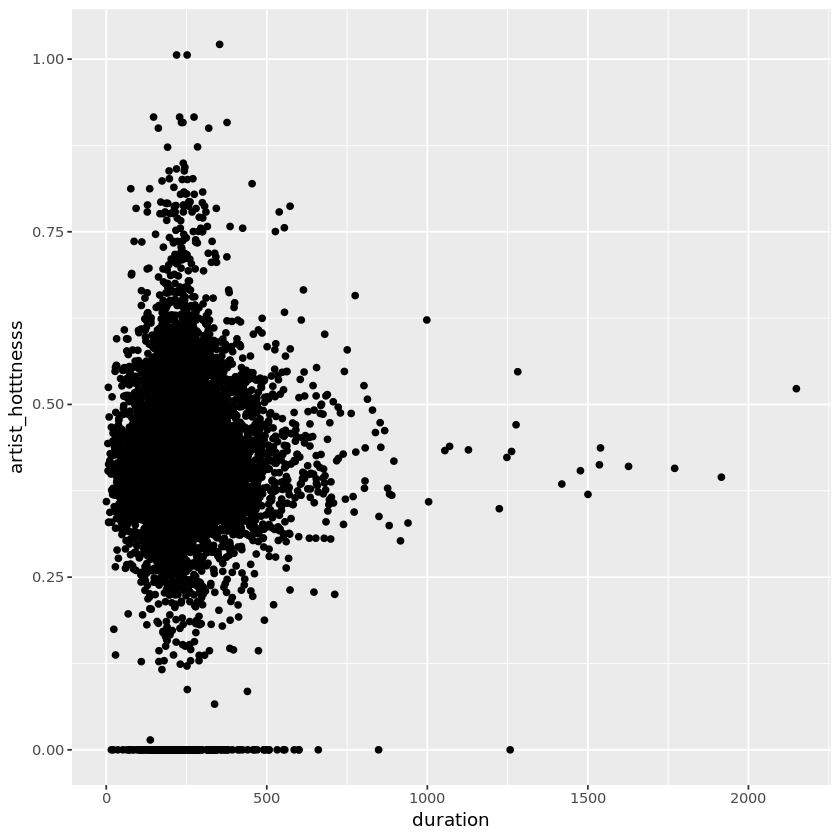

In [10]:
singer_locations %>% # this will define where we get the data from
  ggplot(mapping = aes( # aes stands for aesthetics: this are the visual properties of the graph
      x = duration, # we want the "duration" on the x
      y = artist_hotttnesss)) + # and the "artist_familiarity" on the y
  geom_point() # plotted as points

Your turn now. Modify the following code to plot some other variable.

Warning message:
“Removed 5968 rows containing missing values (geom_point).”

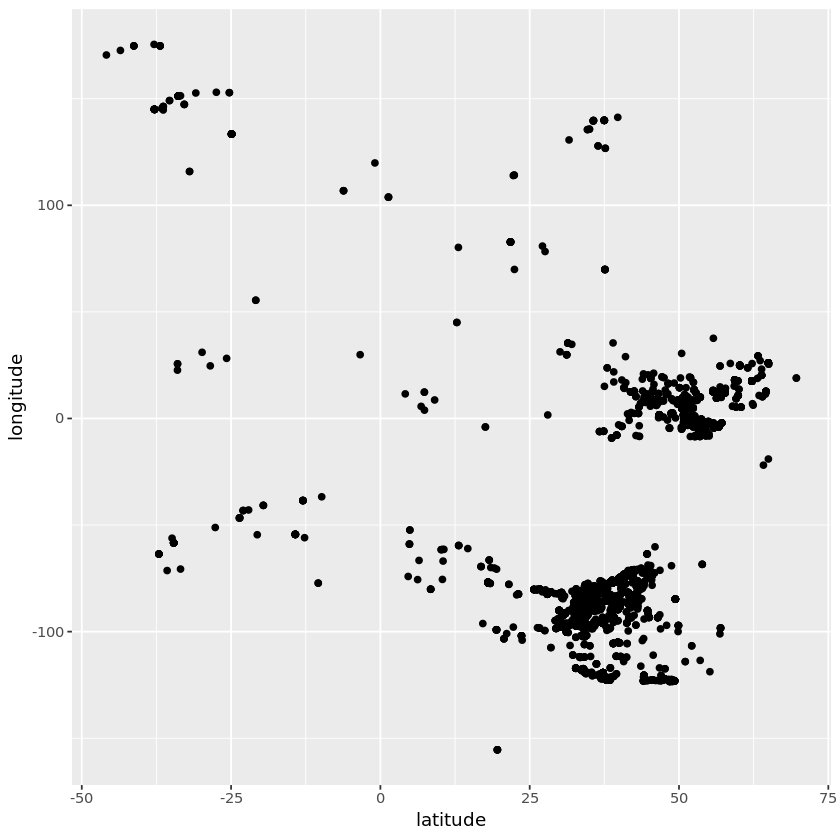

In [12]:
singer_locations %>%
  ggplot(mapping = aes(x =latitude , # your x variable
      y = longitude )) + # your y variable
  geom_point() # plotted as points

We are not limited to only x and y, we have many possible aesthetics to play with: colors, groupings, sizes, alpha (transparencies), shapes, ...

The world is yours to paint! Let's add some colour!

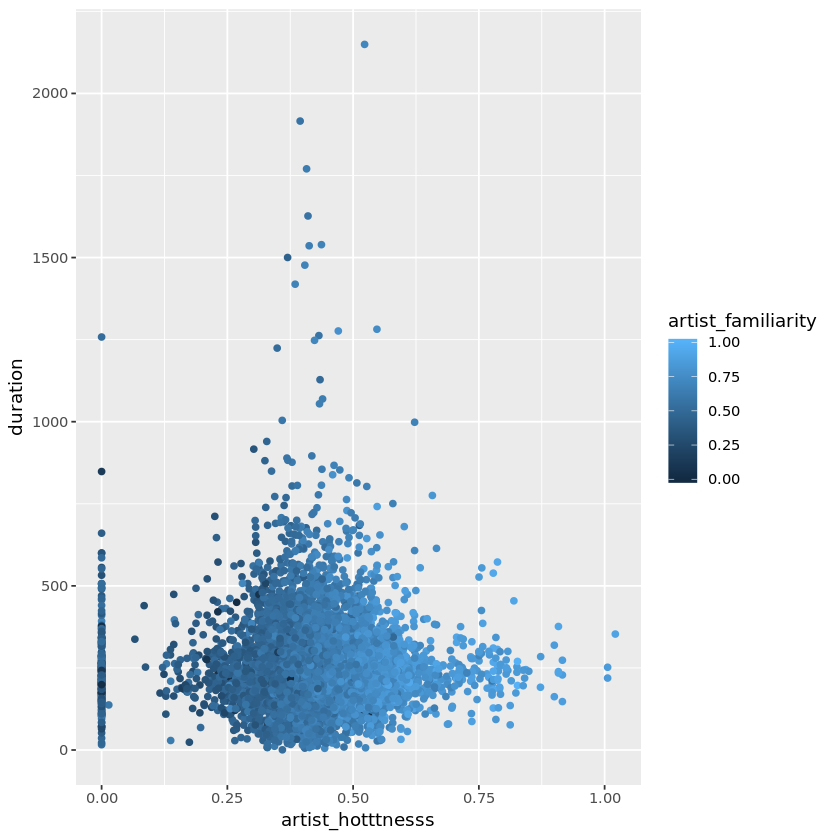

In [13]:
singer_locations %>%
  ggplot(mapping = aes(x = artist_hotttnesss, # your x variable
      y = duration,
      colour = artist_familiarity)) + # your y variable
  geom_point() # plotted as points

We do also have different geometries (points, lines, histograms, ...) that you can start to play with.  
We will see them more in details in the next lectures. If you can't wait, the chapter on [Data Visualization](http://r4ds.had.co.nz/data-visualisation.html) in Hadley's R for Data Science is a great resource.

Now, let's do a good one: did the duration of songs increased or decreased in time? Let's have a look?  
Plot the year on the x axis and the duration on the y axis (_hint_: copy the code from the previous cells and modify it accordingly).

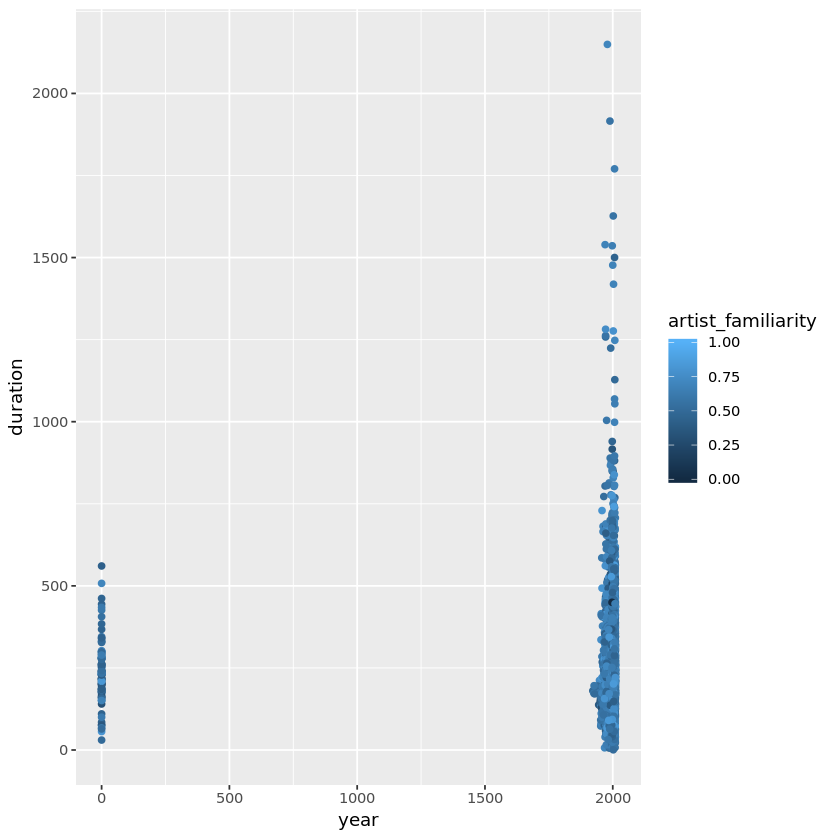

In [14]:
singer_locations %>%
  ggplot(mapping = aes(x = year, # your x variable
      y = duration,
      colour = artist_familiarity)) + # your y variable
  geom_point() # plotted as points

Mmm, what happened? Something doesn't look right?  

Oh, sure, it's those pesky "0" years. The missing years have not been labelled properly, but just inputted as zeros.  
What now?  

Don't worry, we have more than one way of dealing with that, using `filter()`ing and `mutate()`ing functions.

`filter()` is a function that allows to drop some rows, based on a user defined rule.
`mutate()` allows to change the values in a dataframe according to a user defined rule.

Let's start with `filter()` to get only the Black Sabbath songs.

In [15]:
singer_locations %>%
  filter(artist_name == "Black Sabbath")

track_id,title,song_id,release,artist_id,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
TRMTODC128F4271F80,Black Sabbath,SOYUNPV12CF5F87534,Reunion,ARWZ9W91187B9B2B29,Black Sabbath,1970,449.1228,0.570076,0.8325184,52.47859,-1.9086,Black Sabbath,"Birmingham, England"
TRYWNTC12903CD2E5E,Lady Evil,SOIFYLF12AB01880D4,Heaven & Hell,ARWZ9W91187B9B2B29,Black Sabbath,1980,234.1612,0.570076,0.7580165,52.47859,-1.9086,Black Sabbath,"Birmingham, England"


Those are good songs. Good good. But maybe you like something else?

Try and use `filter()` to filter out some songs from artists you like.

In [16]:
singer_locations %>%
  filter(artist_name == "Justin Timberlake")

track_id,title,song_id,release,artist_id,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
TRQAXGH128F9333CE9,Cry Me A River,SOOELRD12AB01801C1,I'm Lovin' It,ARWK5QH1187B9A9B7F,Justin Timberlake,2002,501.1065,0.5835308,0.8426363,NA,NA,NA,NA


So, what if we want more than one artists? Can't we like Black Sabbath AND Justin Timberlake?  
Yes you can, and we won't judge you!

In [17]:
singer_locations %>%
  filter(artist_name %in% c("Black Sabbath", "Justin Timberlake"))

track_id,title,song_id,release,artist_id,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
TRMTODC128F4271F80,Black Sabbath,SOYUNPV12CF5F87534,Reunion,ARWZ9W91187B9B2B29,Black Sabbath,1970,449.1228,0.5700760,0.8325184,52.47859,-1.9086,Black Sabbath,"Birmingham, England"
TRQAXGH128F9333CE9,Cry Me A River,SOOELRD12AB01801C1,I'm Lovin' It,ARWK5QH1187B9A9B7F,Justin Timberlake,2002,501.1065,0.5835308,0.8426363,NA,NA,NA,NA
TRYWNTC12903CD2E5E,Lady Evil,SOIFYLF12AB01880D4,Heaven & Hell,ARWZ9W91187B9B2B29,Black Sabbath,1980,234.1612,0.5700760,0.7580165,52.47859,-1.9086,Black Sabbath,"Birmingham, England"


Let's break it down a moment: we defined a _vector_ containing the strings "Black Sabbath" and "Justin Timberlake" using the concatenation function `c()`; and we asked whether the `artist_name` in that row is in that vector.  
In the tidyverse there are a bunch of verbs as `%in%` that allows you to ask this sort of questions.

But let's go back to the year ~ duration thingy. Our plot is ruined by the 0 years. Let's filter those out!  
Write the right expression instead of the ___ underscores.  
You can use != (that means "different from", "not equal") or > (that stands for "greater than").

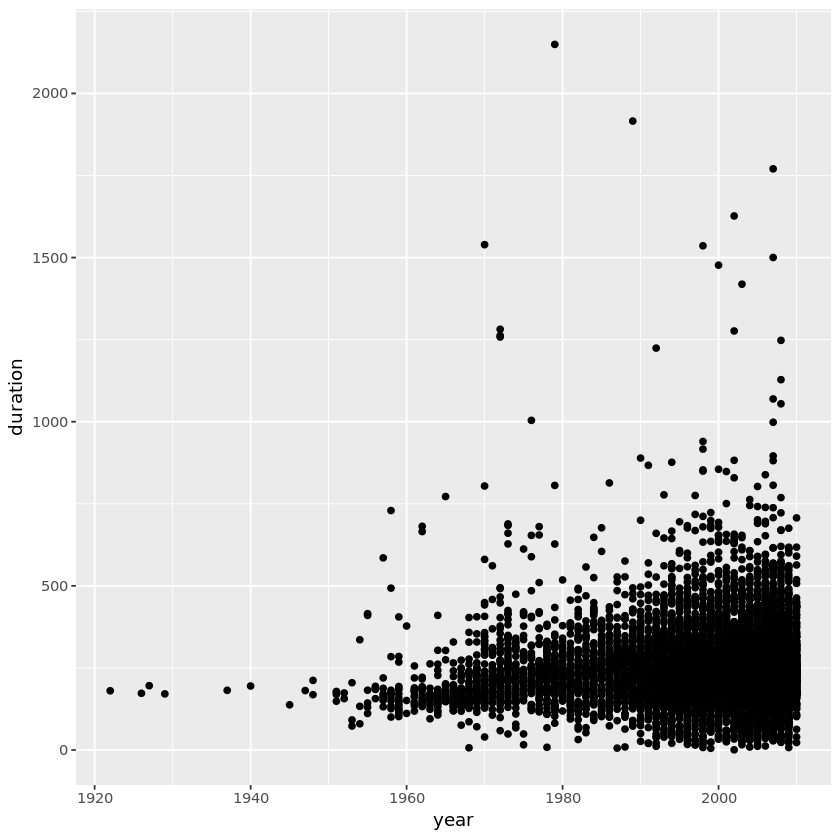

In [19]:
singer_locations %>%
  filter(year != 0) %>%
    ggplot(mapping = aes(x = year, y = duration)) +
  geom_point() 

We can stack more than one `filter()` condition, for example:

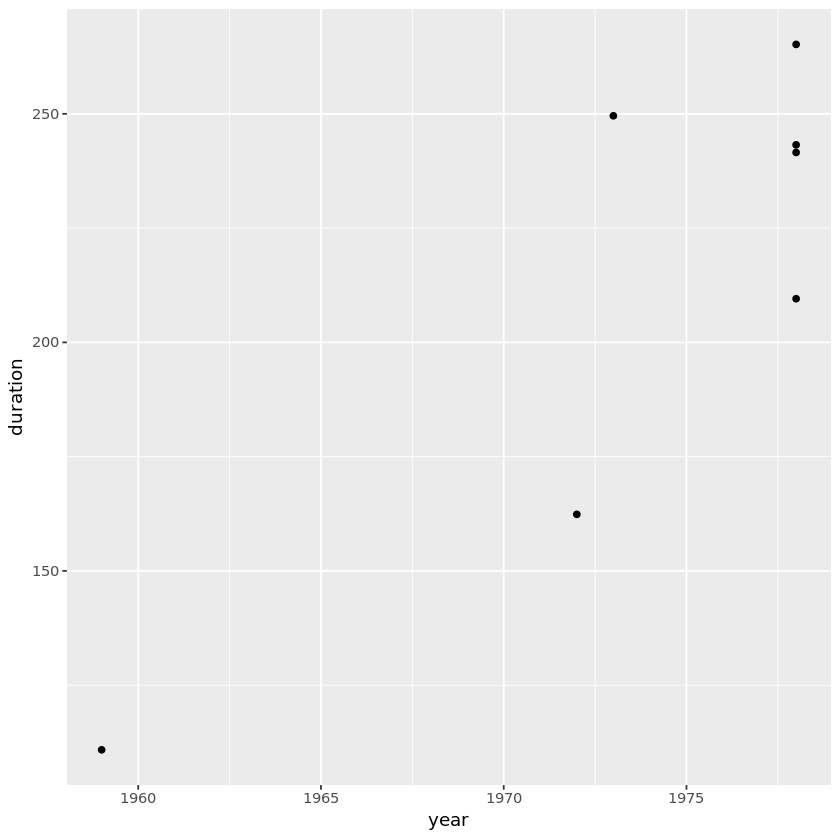

In [20]:
singer_locations %>%
  filter(year > 1950, year < 1980, artist_hotttnesss > 0.7) %>%
    ggplot(mapping = aes(x = year, y = duration)) +
  geom_point() 

The other way we could this is by using `mutate()`. The core idea here is to solve the task by correcting the 0s into missing values.

Thinking like a computer, we need a rule (not a rule of thumb ;-) ). The rule is that,
we look at the `year`,  
if the `year` is equal to 0, we mutate its value to a proper missing (namely, `NA_integer_`, where NA stands for missing and \_integer\_ informs R about the type of the missing)  
and else (if `year` is NOT equal to 0), we leave as it is.

The tidyverse function doing the job is called `if_else()`, and it requires 3 arguments:  
the first is the "if condition" (`year == 0`)  
the second is the value to mutate to if the condition is satisfied,  
the third is the value to mutate to if the condition is not satisfied.

Warning message:
“Removed 100 rows containing missing values (geom_point).”

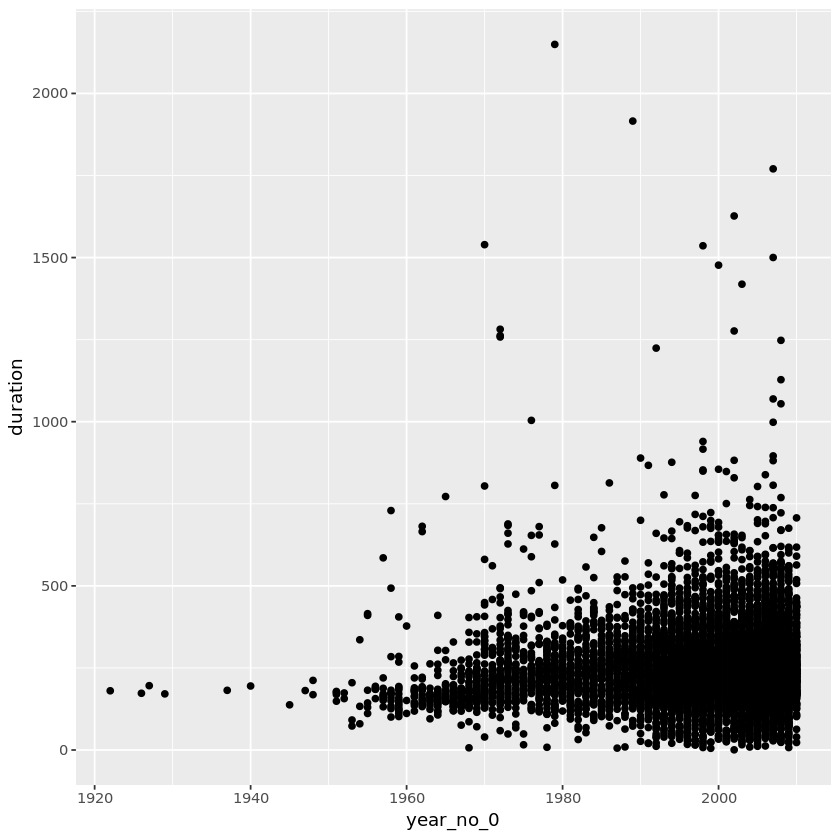

In [21]:
singer_locations %>% # our starting point
  mutate( # we want to modify or create variables
      year_no_0 = # we create a new one
      if_else(year == 0, # if year is zero
              NA_integer_, # code it missing
              year)) %>% # else leave it as it is
  ggplot(mapping = aes(x = year_no_0, y = duration)) +
  geom_point() 

With `mutate()` we can either create new columns or modify existing ones. For example, let's create an index of popularity for bands that is the sum of `artist_familiarity` and `artist_hotttnesss`.

In [22]:
singer_locations %>%
  mutate(artist_popularity = artist_familiarity + artist_hotttnesss) %>%
  head()

track_id,title,song_id,release,artist_id,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city,artist_popularity
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
TRWICRA128F42368DB,The Conversation (Cd),SOSURTI12A81C22FB8,Even If It Kills Me,ARACDPV1187FB58DF4,Motion City Soundtrack,2007,170.4485,0.6410183,0.8230522,NA,NA,NA,NA,1.4640705
TRXJANY128F42246FC,Lonely Island,SODESQP12A6D4F98EF,The Duke Of Earl,ARYBUAO1187FB3F4EB,Gene Chandler,2004,106.5530,0.3937627,0.5700167,41.88415,-87.63241,Gene Chandler,"Chicago, IL",0.9637794
TRIKPCA128F424A553,Here's That Rainy Day,SOQUYQD12A8C131619,Imprompture,AR4111G1187B9B58AB,Paul Horn,1998,527.5947,0.4306226,0.5039940,40.71455,-74.00712,Paul Horn,"New York, NY",0.9346166
TRYEATD128F92F87C9,Rego Park Blues,SOEZGRC12AB017F1AC,Still River,ARQDZP31187B98D623,Ronnie Earl & the Broadcasters,1995,695.1179,0.3622792,0.4773099,NA,NA,NA,NA,0.8395892
TRBYYXH128F4264585,Games,SOPIOCP12A8C13A322,Afro-Harping,AR75GYU1187B9AE47A,Dorothy Ashby,1968,237.3220,0.4107520,0.5303468,42.33168,-83.04792,Dorothy Ashby,"Detroit, MI",0.9410988
TRKFFKR128F9303AE3,More Pipes,SOHQSPY12AB0181325,Six Yanks,ARCENE01187B9AF929,Barleyjuice,2006,192.9400,0.3762635,0.5412950,40.99471,-77.60454,Barleyjuice,Pennsylvania,0.9175585


You can create an index of artist coldness that is the complementary of the the `artist_hotttnesss` (that is, `1 - artist_hotttnesss`).  

In [23]:
singer_locations %>%
  mutate(complementary = 1 - artist_hotttnesss) %>%
  head()

track_id,title,song_id,release,artist_id,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city,complementary
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
TRWICRA128F42368DB,The Conversation (Cd),SOSURTI12A81C22FB8,Even If It Kills Me,ARACDPV1187FB58DF4,Motion City Soundtrack,2007,170.4485,0.6410183,0.8230522,NA,NA,NA,NA,0.3589817
TRXJANY128F42246FC,Lonely Island,SODESQP12A6D4F98EF,The Duke Of Earl,ARYBUAO1187FB3F4EB,Gene Chandler,2004,106.5530,0.3937627,0.5700167,41.88415,-87.63241,Gene Chandler,"Chicago, IL",0.6062373
TRIKPCA128F424A553,Here's That Rainy Day,SOQUYQD12A8C131619,Imprompture,AR4111G1187B9B58AB,Paul Horn,1998,527.5947,0.4306226,0.5039940,40.71455,-74.00712,Paul Horn,"New York, NY",0.5693774
TRYEATD128F92F87C9,Rego Park Blues,SOEZGRC12AB017F1AC,Still River,ARQDZP31187B98D623,Ronnie Earl & the Broadcasters,1995,695.1179,0.3622792,0.4773099,NA,NA,NA,NA,0.6377208
TRBYYXH128F4264585,Games,SOPIOCP12A8C13A322,Afro-Harping,AR75GYU1187B9AE47A,Dorothy Ashby,1968,237.3220,0.4107520,0.5303468,42.33168,-83.04792,Dorothy Ashby,"Detroit, MI",0.5892480
TRKFFKR128F9303AE3,More Pipes,SOHQSPY12AB0181325,Six Yanks,ARCENE01187B9AF929,Barleyjuice,2006,192.9400,0.3762635,0.5412950,40.99471,-77.60454,Barleyjuice,Pennsylvania,0.6237365


## CHALLENGE!

Challenges are harder exercises that require you to explore functionality outside what I explicitly introduced.  

This round the challenge is:

**produce a dataframe of the top 20 artist_names, arranged by popularity**

To solve this you will need to discover 2 new functions: take a look at the "Subset Observations (Rows)" block in the dplyr [cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf).

# PART 3: your turn

Now it's your turn. After the warmup above, let's use a different dataframe, `gapminder` and make some initial explorations, taking care of missing values and produce some plot.  

Play around with the `starwars` dataframe, containing information about Starwars characters, and see if you can reproduce some of the preliminary explorations and manipulations we did together.

# APPENDIX: under the hood

## The Dataframe under the hood

We said before that the data in `singer` is structured as a **dataframe**. Can we check that?  
Sure we can. We can use `typof()`, `mode()`, and `class()` to see what kind of stuff we are dealing with in R.  
We will talk more about this in a future lecture, for the moment just try to apply the three function to `singer_locations`.

In [ ]:
singer_locations %>%
  class()

In [ ]:
# your code goes here

We discovered a couple of things.

The dataset `singer_locations` is a `data.frame`, a `tbl`, and a `tbl_df`.  
What's all that? `data.frame` is the basic R structure for dataframes, `tbl` and `tbl_df` are a special version of dataframes, defined within the tidyverse, that are called **tibbles**. A tibble is a dataframe that needs to satisfiy some extra constraint: take a look [here](http://r4ds.had.co.nz/tibbles.html#tibbles-vs.data.frame) to an overview of the differences if you are supercurious.

Moreover, the type and mode of `singer_locations` is `list`. A `list` is a basic data structure in R. Under the hood, dataframes (and tibbles) are lists of columns, and each column is a `vector` of some kind (numeric, character, ...); all the columns in a dataframe **must** have the same length.